In [ ]:
require 'image'

In [1]:
require 'torch'
require 'paths'
require 'optim'
require 'nn'

DataLoader = require 'dataloader'
models = require 'models/init'
Trainer = require 'train'
opts = require 'opts'
checkpoints = require 'checkpoints'

torch.setdefaulttensortype('torch.FloatTensor')

In [36]:
opt = opts.parse('')

{
  cudnn : fastest
  LR : 0.1
  nThreads : 2
  nClasses : 14
  batchSize : 1
  testOnly : false
  netType : segnet
  resetClassifier : false
  optimState : none
  gen : gen
  nGPU : 1
  imgH : 240
  data : 
  momentum : 0.9
  dataset : camvid
  epochNumber : 1
  manualSeed : 0
  resume : none
  weightDecay : 0.0001
  nEpochs : 10
  imgW : 320
  shareGradInput : false
  backend : cudnn
  tenCrop : false
  retrain : none
}


In [42]:
opt.data = '/home/srv/hd1/citiscapes/CamVid_512x1024'
opt.LR = 0.001
opt.batchSize = 4

In [38]:
torch.setnumthreads(4)
opt.nThreads = 4

In [39]:
torch.manualSeed(opt.manualSeed)
cutorch.manualSeedAll(opt.manualSeed)

In [4]:
model, criterion = models.setup(opt, None)

=> Creating model from file: models/segnet.lua	


In [5]:
model

nn.Sequential {
  [input -> (1) -> (2) -> output]
  (1): nn.Sequential {
    [input -> (1) -> (2) -> (3) -> (4) -> (5) -> (6) -> (7) -> (8) -> (9) -> (10) -> (11) -> (12) -> (13) -> (14) -> (15) -> (16) -> (17) -> (18) -> (19) -> (20) -> (21) -> (22) -> (23) -> (24) -> (25) -> (26) -> (27) -> (28) -> (29) -> (30) -> (31) -> (32) -> (33) -> (34) -> (35) -> (36) -> (37) -> (38) -> (39) -> (40) -> (41) -> (42) -> (43) -> (44) -> output]
    (1): nn.SpatialConvolution(3 -> 64, 3x3, 1,1, 1,1)
    (2): nn.SpatialBatchNormalization
    (3): nn.ReLU
    (4): nn.SpatialConvolution(64 -> 64, 3x3, 1,1, 1,1)
    (5): nn.SpatialBatchNormalization
    (6): nn.ReLU
    (7): nn.SpatialMaxPooling(2x2, 2,2)
    (8): nn.SpatialConvolution(64 -> 128, 3x3, 1,1, 1,1)
    (9): nn.SpatialBatchNormalization
    (10): nn.ReLU
    (11): nn.SpatialConvolution(128 -> 128, 3x3, 1,1, 1,1)
    (12): nn.SpatialBatchNormalization
    (13): nn.ReLU
    (14): nn.SpatialMaxPooling(2x2, 2,2)
    (15): nn.SpatialConvolution

8): nn.SpatialMaxUnpooling associated to nn.SpatialMaxPooling(2x2, 2,2)
    (39): nn.SpatialConvolution(64 -> 64, 3x3, 1,1, 1,1)
    (40): nn.SpatialBatchNormalization
    (41): nn.ReLU
    (42): nn.SpatialConvolution(64 -> 14, 3x3, 1,1, 1,1)
  }
}
{
  gradInput : CudaTensor - empty
  modules : 
    {
      1 : 
        nn.Sequential {
          [input -> (1) -> (2) -> (3) -> (4) -> (5) -> (6) -> (7) -> (8) -> (9) -> (10) -> (11) -> (12) -> (13) -> (14) -> (15) -> (16) -> (17) -> (18) -> (19) -> (20) -> (21) -> (22) -> (23) -> (24) -> (25) -> (26) -> (27) -> (28) -> (29) -> (30) -> (31) -> (32) -> (33) -> (34) -> (35) -> (36) -> (37) -> (38) -> (39) -> (40) -> (41) -> (42) -> (43) -> (44) -> output]
          (1): nn.SpatialConvolution(3 -> 64, 3x3, 1,1, 1,1)
          (2): nn.SpatialBatchNormalization
          (3): nn.ReLU
          (4): nn.SpatialConvolution(64 -> 64, 3x3, 1,1, 1,1)
          (5): nn.SpatialBatchNormalization
          (6): nn.ReLU
          (7): nn.SpatialMaxPoolin

        gradBias : CudaTensor - size: 64
                }
              2 : 
                nn.SpatialBatchNormalization
                {
                  gradBias : CudaTensor - size: 64
                  output : CudaTensor - empty
                  gradInput : CudaTensor - empty
                  running_var : CudaTensor - size: 64
                  momentum : 0.1
                  gradWeight : CudaTensor - size: 64
                  eps : 1e-05
                  _type : torch.CudaTensor
                  affine : true
                  running_mean : CudaTensor - size: 64
                  bias : CudaTensor - size: 64
                  weight : CudaTensor - size: 64
                  train : true
                }
              3 : 
                nn.ReLU
                {
                  inplace : false
                  threshold : 0
                  _type : torch.CudaTensor
                  output : CudaTensor - empty
                  gradInput : CudaTensor - empty
   

   4 : 
                nn.SpatialConvolution(64 -> 64, 3x3, 1,1, 1,1)
                {
                  dH : 1
                  dW : 1
                  nInputPlane : 64
                  output : CudaTensor - empty
                  kH : 3
                  gradInput : CudaTensor - empty
                  kW : 3
                  nOutputPlane : 64
                  weight : CudaTensor - size: 64x64x3x3
                  _type : torch.CudaTensor
                  gradWeight : CudaTensor - size: 64x64x3x3
                  padW : 1
                  bias : CudaTensor - size: 64
                  padH : 1
                  gradBias : CudaTensor - size: 64
                }
              5 : 
                nn.SpatialBatchNormalization
                {
                  gradBias : CudaTensor - size: 64
                  output : CudaTensor - empty
                  gradInput : CudaTensor - empty
                  running_var : CudaTensor - size: 64
                  momentum : 0.1
 

      eps : 1e-05
                  _type : torch.CudaTensor
                  affine : true
                  running_mean : CudaTensor - size: 64
                  bias : CudaTensor - size: 64
                  weight : CudaTensor - size: 64
                  train : true
                }
              6 : 
                nn.ReLU
                {
                  inplace : false
                  threshold : 0
                  _type : torch.CudaTensor
                  output : CudaTensor - empty
                  gradInput : CudaTensor - empty
                  val : 0
                }
              7 : 
                nn.SpatialMaxPooling(2x2, 2,2)
                {
                  dH : 2
                  dW : 2
                  kW : 2
                  gradInput : CudaTensor - empty
                  indices : CudaTensor - empty
                  _type : torch.CudaTensor
                  padH : 0
                  ceil_mode : false
                  output : CudaTensor

               padW : 0
                }
              8 : 
                nn.SpatialConvolution(64 -> 128, 3x3, 1,1, 1,1)
                {
                  dH : 1
                  dW : 1
                  nInputPlane : 64
                  output : CudaTensor - empty
                  kH : 3
                  gradInput : CudaTensor - empty
                  kW : 3
                  nOutputPlane : 128
                  weight : CudaTensor - size: 128x64x3x3
                  _type : torch.CudaTensor
                  gradWeight : CudaTensor - size: 128x64x3x3
                  padW : 1
                  bias : CudaTensor - size: 128
                  padH : 1
                  gradBias : CudaTensor - size: 128
                }
              9 : 
                nn.SpatialBatchNormalization
                {
                  gradBias : CudaTensor - size: 128
          

        output : CudaTensor - empty
                  gradInput : CudaTensor - empty
                  running_var : CudaTensor - size: 128
                  momentum : 0.1
                  gradWeight : CudaTensor - size: 128
                  eps : 1e-05
                  _type : torch.CudaTensor
                  affine : true
                  running_mean : CudaTensor - size: 128
                  bias : CudaTensor - size: 128
                  weight : CudaTensor - size: 128
                  train : true
                }
              10 : 
                nn.ReLU
                {
                  inplace : false
                  threshold : 0
                  _type : torch.CudaTensor
                  output : CudaTensor - empty
                  gradInput : CudaTensor - empty
                  val : 0
                }
              11 : 
                nn.SpatialConvolution(128 -> 128, 3x3, 1,1, 1,1)
                {
                  dH : 1
                  dW : 1
  

                  output : CudaTensor - empty
                  kH : 3
                  gradInput : CudaTensor - empty
                  kW : 3
                  nOutputPlane : 128
                  weight : CudaTensor - size: 128x128x3x3
                  _type : torch.CudaTensor
                  gradWeight : CudaTensor - size: 128x128x3x3
                  padW : 1
                  bias : CudaTensor - size: 128
                  padH : 1
                  gradBias : CudaTensor - size: 128
                }
              12 : 
                nn.SpatialBatchNormalization
                {
                  gradBias : CudaTensor - size: 128
                  output : CudaTensor - empty
                  gradInput : CudaTensor - empty
                  running_var : CudaTensor - size: 128
                  momentum : 0.1
                  gradWeight : CudaTensor - size: 128
                  eps : 1e-05
                  _type : torch.CudaTensor
                  affine : true
      

            bias : CudaTensor - size: 128
                  weight : CudaTensor - size: 128
                  train : true
                }
              13 : 
                nn.ReLU
                {
                  inplace : false
                  threshold : 0
                  _type : torch.CudaTensor
                  output : CudaTensor - empty
                  gradInput : CudaTensor - empty
                  val : 0
                }
              14 : 
                nn.SpatialMaxPooling(2x2, 2,2)
                {
                  dH : 2
                  dW : 2
                  kW : 2
                  gradInput : CudaTensor - empty
                  indices : CudaTensor - empty
                  _type : torch.CudaTensor
                  padH : 0
                  ceil_mode : false
                  output : CudaTensor - empty
                  kH : 2
                  padW : 0
                }
              15 : 
                nn.SpatialConvolution(128 -> 256, 3

                dH : 1
                  dW : 1
                  nInputPlane : 128
                  output : CudaTensor - empty
                  kH : 3
                  gradInput : CudaTensor - empty
                  kW : 3
                  nOutputPlane : 256
                  weight : CudaTensor - size: 256x128x3x3
                  _type : torch.CudaTensor
                  gradWeight : CudaTensor - size: 256x128x3x3
                  padW : 1
                  bias : CudaTensor - size: 256
                  padH : 1
                  gradBias : CudaTensor - size: 256
                }
              16 : 
                nn.SpatialBatchNormalization
                {
                  gradBias : CudaTensor - size: 256
                  output : CudaTensor - empty
                  gradInput : CudaTensor - empty
                  running_var : CudaTensor - size: 256
                  momentum : 0.1
                  gradWeight : CudaTensor - size: 256
                  eps : 1e-

               affine : true
                  running_mean : CudaTensor - size: 256
                  bias : CudaTensor - size: 256
                  weight : CudaTensor - size: 256
                  train : true
                }
              17 : 
                nn.ReLU
                {
                  inplace : false
                  threshold : 0
                  _type : torch.CudaTensor
                  output : CudaTensor - empty
                  gradInput : CudaTensor - empty
                  val : 0
                }
              18 : 
                nn.SpatialConvolution(256 -> 256, 3x3, 1,1, 1,1)
                {
                  dH : 1
                  dW : 1
                  nInputPlane : 256
                  output : CudaTensor - empty
                  kH : 3
                  gradInput : CudaTensor - empty
                  kW : 3
                  nOutputPlane : 256
       

           weight : CudaTensor - size: 256x256x3x3
                  _type : torch.CudaTensor
                  gradWeight : CudaTensor - size: 256x256x3x3
                  padW : 1
                  bias : CudaTensor - size: 256
                  padH : 1
                  gradBias : CudaTensor - size: 256
                }
              19 : 
                nn.SpatialBatchNormalization
                {
                  gradBias : CudaTensor - size: 256
                  output : CudaTensor - empty
                  gradInput : CudaTensor - empty
                  running_var : CudaTensor - size: 256
                  momentum : 0.1
                  gradWeight : CudaTensor - size: 256
                  eps : 1e-05
                  _type : torch.CudaTensor
                  affine : true
                  running_mean : CudaTensor - size: 256
                  bias : CudaTensor - size: 256
                  weight : CudaTensor - size: 256
                  train : true
          

{
                  inplace : false
                  threshold : 0
                  _type : torch.CudaTensor
                  output : CudaTensor - empty
                  gradInput : CudaTensor - empty
                  val : 0
                }
              21 : 
                nn.SpatialConvolution(256 -> 256, 3x3, 1,1, 1,1)
                {
                  dH : 1
                  dW : 1
                  nInputPlane : 256
                  output : CudaTensor - empty
                  kH : 3
                  gradInput : CudaTensor - empty
                  kW : 3
                  nOutputPlane : 256
                  weight : CudaTensor - size: 256x256x3x3
                  _type : torch.CudaTensor
                  gradWeight : CudaTensor - size: 256x256x3x3
                  padW : 1
                  bias : CudaTensor - size: 256
                  padH : 1
                  gradBias : CudaTensor - size: 256
         

       }
              22 : 
                nn.SpatialBatchNormalization
                {
                  gradBias : CudaTensor - size: 256
                  output : CudaTensor - empty
                  gradInput : CudaTensor - empty
                  running_var : CudaTensor - size: 256
                  momentum : 0.1
                  gradWeight : CudaTensor - size: 256
                  eps : 1e-05
                  _type : torch.CudaTensor
                  affine : true
                  running_mean : CudaTensor - size: 256
                  bias : CudaTensor - size: 256
                  weight : CudaTensor - size: 256
                  train : true
                }
              23 : 
                nn.ReLU
                {
                  inplace : false
                  threshold : 0
                  _type : torch.CudaTensor
                  output : CudaTensor - empty
                  gradInput : CudaTensor - empty
                  val : 0
                }
 

24 : 
                nn.SpatialMaxPooling(2x2, 2,2)
                {
                  dH : 2
                  dW : 2
                  kW : 2
                  gradInput : CudaTensor - empty
                  indices : CudaTensor - empty
                  _type : torch.CudaTensor
                  padH : 0
                  ceil_mode : false
                  output : CudaTensor - empty
                  kH : 2
                  padW : 0
                }
              25 : 
                nn.SpatialConvolution(256 -> 512, 3x3, 1,1, 1,1)
                {
                  dH : 1
                  dW : 1
                  nInputPlane : 256
                  output : CudaTensor - empty
                  kH : 3
                  gradInput : CudaTensor - empty
                  kW : 3
                  nOutputPlane : 512
                  weight : CudaTensor - size: 512x256x3x3
                  _type : torch.CudaTensor


                  gradWeight : CudaTensor - size: 512x256x3x3
                  padW : 1
                  bias : CudaTensor - size: 512
                  padH : 1
                  gradBias : CudaTensor - size: 512
                }
              26 : 
                nn.SpatialBatchNormalization
                {
                  gradBias : CudaTensor - size: 512
                  output : CudaTensor - empty
                  gradInput : CudaTensor - empty
                  running_var : CudaTensor - size: 512
                  momentum : 0.1
                  gradWeight : CudaTensor - size: 512
                  eps : 1e-05
                  _type : torch.CudaTensor
                  affine : true
                  running_mean : CudaTensor - size: 512
                  bias : CudaTensor - size: 512
                  weight : CudaTensor - size: 512
                  train : true
                }
              27 : 
            

    nn.ReLU
                {
                  inplace : false
                  

threshold : 0
                  _type : torch.CudaTensor
                  output : CudaTensor - empty
                  gradInput : CudaTensor - empty
                  val : 0
                }
              28 : 
                nn.SpatialConvolution(512 -> 512, 3x3, 1,1, 1,1)
                {
                  dH : 1
                  dW : 1
                  nInputPlane : 512
                  output : CudaTensor - empty
                  kH : 3
                  gradInput : CudaTensor - empty
                  kW : 3
                  nOutputPlane : 512
                  weight : CudaTensor - size: 512x512x3x3
                  _type : torch.CudaTensor
                  gradWeight : CudaTensor - size: 512x512x3x3
                  padW : 1
                  bias : CudaTensor - size: 512
                  padH : 1
                  gradBias : CudaTensor - size: 512
                }
              29 : 
 

               nn.SpatialBatchNormalization
                {
                  gradBias : CudaTensor - size: 512
                  output : CudaTensor - empty
                  gradInput : CudaTensor - empty
                  running_var : CudaTensor - size: 512
                  momentum : 0.1
                  gradWeight : CudaTensor - size: 512
                  eps : 1e-05
                  _type : torch.CudaTensor
                  affine : true
                  running_mean : CudaTensor - size: 512
                  bias : CudaTensor - size: 512
                  weight : CudaTensor - size: 512
                  train : true
                }
              30 : 
                nn.ReLU
                {
                  inplace : false
                  threshold : 0
                  _type : torch.CudaTensor
                  output : CudaTensor - empty
                  gradInput : CudaTensor - empty
                  val : 0
                }
              31 : 
          

      nn.SpatialConvolution(512 -> 512, 3x3, 1,1, 1,1)
                {
                  dH : 1
                  dW : 1
                  nInputPlane : 512
                  output : CudaTensor - empty
                  kH : 3
                  gradInput : CudaTensor - empty
                  kW : 3
                  nOutputPlane : 512
                  weight : CudaTensor - size: 512x512x3x3
                  _type : torch.CudaTensor
                  gradWeight : CudaTensor - size: 512x512x3x3
                  padW : 1
                  bias : CudaTensor - size: 512
                  padH : 1
                  gradBias : CudaTensor - size: 512
                }
              32 : 
                nn.SpatialBatchNormalization
                {
                  gradBias : CudaTensor - size: 512
                  output : CudaTensor - empty
                  gradInput : CudaTensor - empty
                  running_var : CudaTensor - size: 512
                  momentum : 0.1
      

   gradWeight : CudaTensor - size: 512
                  eps : 1e-05
                  _type : torch.CudaTensor
                  affine : true
                  running_mean : CudaTensor - size: 512
                  bias : CudaTensor - size: 512
                  weight : CudaTensor - size: 512
                  train : true
                }
              33 : 
                nn.ReLU
                {
                  inplace : false
                  threshold : 0
                  _type : torch.CudaTensor
                  output : CudaTensor - empty
                  gradInput : CudaTensor - empty
                  val : 0
                }
              34 : 
                nn.SpatialMaxPooling(2x2, 2,2)
                {
                  dH : 2
                  dW : 2
                  kW : 2
                  gradInput : CudaTensor - empty
                  indices : CudaTensor - empty
                  _type : torch.CudaTensor


                  padH : 0
                  ceil_mode : false
                  output : CudaTensor - empty
                  kH : 2
                  padW : 0
                }
              35 : 
                nn.SpatialConvolution(512 -> 512, 3x3, 1,1, 1,1)
                {
                  dH : 1
                  dW : 1
                  nInputPlane : 512
                  output : CudaTensor - empty
                  kH : 3
                  gradInput : CudaTensor - empty
                  kW : 3
                  nOutputPlane : 512
                  weight : CudaTensor - size: 512x512x3x3
                  _type : torch.CudaTensor
                  gradWeight : CudaTensor - size: 512x512x3x3
                  padW : 1
                  bias : CudaTensor - size: 512
                  padH : 1
                  gradBias : CudaTensor - size: 512
                }
              36 : 
        

        nn.SpatialBatchNormalization
                {
                  gradBias : CudaTensor - size: 512
                  output : CudaTensor - empty
                  gradInput : CudaTensor - empty
                  running_var : CudaTensor - size: 512
                  momentum : 0.1
                  gradWeight : CudaTensor - size: 512
                  eps : 1e-05
                  _type : torch.CudaTensor
                  affine : true
                  running_mean : CudaTensor - size: 512
                  bias : CudaTensor - size: 512
                  weight : CudaTensor - size: 512
                  train : true
                }
              37 : 
                nn.ReLU
                {
                  inplace : false
                  threshold : 0
                  _type : torch.CudaTensor
                  output : CudaTensor - empty
                  gradInput : CudaTensor - empty
                  val : 0
           

     }
              38 : 
                nn.SpatialConvolution(512 -> 512, 3x3, 1,1, 1,1)
                {
                  dH : 1
                  dW : 1
                  nInputPlane : 512
                  output : CudaTensor - empty
                  kH : 3
                  gradInput : CudaTensor - empty
                  kW : 3
                  nOutputPlane : 512
                  weight : CudaTensor - size: 512x512x3x3
                  _type : torch.CudaTensor
                  gradWeight : CudaTensor - size: 512x512x3x3
                  padW : 1
                  bias : CudaTensor - size: 512
                  padH : 1
                  gradBias : CudaTensor - size: 512
                }
              39 : 
                nn.SpatialBatchNormalization
                {
                  gradBias : CudaTensor - size: 512
                  output : CudaTensor - empty
                  gradInput : CudaTensor - empty


                  running_var : CudaTensor - size: 512
                  momentum : 0.1
                  gradWeight : CudaTensor - size: 512
                  eps : 1e-05
                  _type : torch.CudaTensor
                  affine : true
                  running_mean : CudaTensor - size: 512
                  bias : CudaTensor - size: 512
                  weight : CudaTensor - size: 512
                  train : true
                }
              40 : 
                nn.ReLU
                {
                  inplace : false
                  threshold : 0
                  _type : torch.CudaTensor
                  output : CudaTensor - empty
                  gradInput : CudaTensor - empty
                  val : 0
                }
              41 : 
                nn.SpatialConvolution(512 -> 512, 3x3, 1,1, 1,1)
                {
                  dH : 1
                  dW : 1
                  nInputPlane : 512


                  output : CudaTensor - empty
                  kH : 3
                  gradInput : CudaTensor - empty
                  kW : 3
                  nOutputPlane : 512
                  weight : CudaTensor - size: 512x512x3x3
                  _type : torch.CudaTensor
                  gradWeight : CudaTensor - size: 512x512x3x3
                  padW : 1
                  bias : CudaTensor - size: 512
                  padH : 1
                  gradBias : CudaTensor - size: 512
                }
              42 : 
                nn.SpatialBatchNormalization
                {
                  gradBias : CudaTensor - size: 512
                  output : CudaTensor - empty
                  gradInput : CudaTensor - empty
                  running_var : CudaTensor - size: 512
                  momentum : 0.1
                  gradWeight : CudaTensor - size: 512
                  eps : 1e-05
                  _type : torch.CudaTensor
                  affine : true
      

          running_mean : CudaTensor - size: 512
                  bias : CudaTensor - size: 512
                  weight : CudaTensor - size: 512
                  train : true
                }
              43 : 
                nn.ReLU
                {
                  inplace : false
                  threshold : 0
                  _type : torch.CudaTensor
                  output : CudaTensor - empty
                  gradInput : CudaTensor - empty
                  val : 0
                }
              44 : 
                nn.SpatialMaxPooling(2x2, 2,2)
                {
                  dH : 2
                  dW : 2
                  kW : 2
                  gradInput : CudaTensor - empty
                  indices : CudaTensor - empty
                  _type : torch.CudaTensor
                  padH : 0
                  ceil_mode : false
                  output : CudaTensor - empty
          

        kH : 2
                  padW : 0
                }
            }
          _type : torch.CudaTensor
          output : CudaTensor - empty
        }
      2 : 
        nn.Sequential {
          [input -> (1) -> (2) -> (3) -> (4) -> (5) -> (6) -> (7) -> (8) -> (9) -> (10) -> (11) -> (12) -> (13) -> (14) -> (15) -> (16) -> (17) -> (18) -> (19) -> (20) -> (21) -> (22) -> (23) -> (24) -> (25) -> (26) -> (27) -> (28) -> (29) -> (30) -> (31) -> (32) -> (33) -> (34) -> (35) -> (36) -> (37) -> (38) -> (39) -> (40) -> (41) -> (42) -> output]
          (1): nn.SpatialMaxUnpooling associated to nn.SpatialMaxPooling(2x2, 2,2)
          (2): nn.SpatialConvolution(512 -> 512, 3x3, 1,1, 1,1)
          (3): nn.SpatialBatchNormalization
          (4): nn.ReLU
          (5): nn.SpatialConvolution(512 -> 512, 3x3, 1,1, 1,1)
          (6): nn.SpatialBatchNormalization
          (7): nn.ReLU
          (8): nn.SpatialConvolution(512 -> 512, 3x3, 1,1, 1,1)
          (9): nn.SpatialBatchNormalization


    dW : 1
                  nInputPlane : 512
                  output : CudaTensor - empty
                  kH : 3
                  gradInput : CudaTensor - empty
                  kW : 3
                  nOutputPlane : 512
                  weight : CudaTensor - size: 512x512x3x3
                  _type : torch.CudaTensor
                  gradWeight : CudaTensor - size: 512x512x3x3
                  padW : 1
                  bias : CudaTensor - size: 512
                  padH : 1
                  gradBias : CudaTensor - size: 512
                }
              3 : 
                nn.SpatialBatchNormalization
                {
                  gradBias : CudaTensor - size: 512
                  output : CudaTensor - empty
                  gradInput : CudaTensor - empty
                  running_var : CudaTensor - size: 512
                  momentum : 0.1
                  gradWeight : CudaTensor - size: 512
                  eps : 1e-05
                  _type : torch.Cud

          affine : true
                  running_mean : CudaTensor - size: 512
                  bias : CudaTensor - size: 512
                  weight : CudaTensor - size: 512
                  train : true
                }
              4 : 
                nn.ReLU
                {
                  inplace : false
                  threshold : 0
                  _type : torch.CudaTensor
                  output : CudaTensor - empty
                  gradInput : CudaTensor - empty
                  val : 0
                }
              5 : 
                nn.SpatialConvolution(512 -> 512, 3x3, 1,1, 1,1)
                {
                  dH : 1
                  dW : 1
                  nInputPlane : 512
                  output : CudaTensor - empty
                  kH : 3
                  gradInput : CudaTensor - empty
                  kW : 3
                  nOutputPlane : 512


                  weight : CudaTensor - size: 512x512x3x3
                  _type : torch.CudaTensor
                  gradWeight : CudaTensor - size: 512x512x3x3
                  padW : 1
                  bias : CudaTensor - size: 512
                  padH : 1
                  gradBias : CudaTensor - size: 512
                }
              6 : 
                nn.SpatialBatchNormalization
                {
                  gradBias : CudaTensor - size: 512
                  output : CudaTensor - empty
                  gradInput : CudaTensor - empty
                  running_var : CudaTensor - size: 512
                  momentum : 0.1
                  gradWeight : CudaTensor - size: 512
                  eps : 1e-05
                  _type : torch.CudaTensor
                  affine : true
                  running_mean : CudaTensor - size: 512
                  bias : CudaTensor - size: 512
                  weight : CudaTensor - size: 512
                  train : true
    

       7 : 
                nn.ReLU
                {
                  inplace : false
                  threshold : 0
                  _type : torch.CudaTensor
                  output : CudaTensor - empty
                  gradInput : CudaTensor - empty
                  val : 0
                }
              8 : 
                nn.SpatialConvolution(512 -> 512, 3x3, 1,1, 1,1)
                {
                  dH : 1
                  dW : 1
                  nInputPlane : 512
                  output : CudaTensor - empty
                  kH : 3
                  gradInput : CudaTensor - empty
                  kW : 3
                  nOutputPlane : 512
                  weight : CudaTensor - size: 512x512x3x3
                  _type : torch.CudaTensor
                  gradWeight : CudaTensor - size: 512x512x3x3
                  padW : 1
                  bias : CudaTensor - size: 512
                  padH : 1
     

             gradBias : CudaTensor - size: 512
                }
              9 : 
                nn.SpatialBatchNormalization
                {
                  gradBias : CudaTensor - size: 512
                  output : CudaTensor - empty
                  gradInput : CudaTensor - empty
                  running_var : CudaTensor - size: 512
                  momentum : 0.1
                  gradWeight : CudaTensor - size: 512
                  eps : 1e-05
                  _type : torch.CudaTensor
                  affine : true
                  running_mean : CudaTensor - size: 512
                  bias : CudaTensor - size: 512
                  weight : CudaTensor - size: 512
                  train : true
                }
              10 : 
                nn.ReLU
                {
                  inplace : false
                  threshold : 0
                  _type : torch.CudaTensor
                  output : CudaTensor - empty
                  gradInput : CudaTenso

    }
              11 : 
                nn.SpatialMaxUnpooling associated to nn.SpatialMaxPooling(2x2, 2,2)
                {
                  gradInput : CudaTensor - empty
                  pooling : nn.SpatialMaxPooling(2x2, 2,2)
                  _type : torch.CudaTensor
                  output : CudaTensor - empty
                }
              12 : 
                nn.SpatialConvolution(512 -> 512, 3x3, 1,1, 1,1)
                {
                  dH : 1
                  dW : 1
                  nInputPlane : 512
                  output : CudaTensor - empty
                  kH : 3
                  gradInput : CudaTensor - empty
                  kW : 3
                  nOutputPlane : 512
                  weight : CudaTensor - size: 512x512x3x3
                  _type : torch.CudaTensor
                  gradWeight : CudaTensor - size: 512x512x3x3
                  padW : 1
                  bias : CudaTensor - size: 512
                  padH : 1
                  gra

  }
              13 : 
                nn.SpatialBatchNormalization
                {
                  gradBias : CudaTensor - size: 512
                  output : CudaTensor - empty
                  gradInput : CudaTensor - empty
                  running_var : CudaTensor - size: 512
                  momentum : 0.1
                  gradWeight : CudaTensor - size: 512
                  eps : 1e-05
                  _type : torch.CudaTensor
                  affine : true
                  running_mean : CudaTensor - size: 512
                  bias : CudaTensor - size: 512
                  weight : CudaTensor - size: 512
                  train : true
                }
              14 : 
                nn.ReLU
                {
                  inplace : false
                  threshold : 0
                  _type : torch.CudaTensor
                  output : CudaTensor - empty
                  gradInput : CudaTensor - empty
                  val : 0
  

              }
              15 : 
                nn.SpatialConvolution(512 -> 512, 3x3, 1,1, 1,1)
                {
                  dH : 1
                  dW : 1
                  nInputPlane : 512
                  output : CudaTensor - empty
                  kH : 3
                  gradInput : CudaTensor - empty
                  kW : 3
                  nOutputPlane : 512
                  weight : CudaTensor - size: 512x512x3x3
                  _type : torch.CudaTensor
                  gradWeight : CudaTensor - size: 512x512x3x3
                  padW : 1
                  bias : CudaTensor - size: 512
                  padH : 1
                  gradBias : CudaTensor - size: 512
                }
              16 : 
                nn.SpatialBatchNormalization
                {
                  gradBias : CudaTensor - size: 512
                  output : CudaTensor - empty
                  gradInput : CudaTensor - empty
              

    running_var : CudaTensor - size: 512
                  momentum : 0.1
                  gradWeight : CudaTensor - size: 512
                  eps : 1e-05
                  _type : torch.CudaTensor
                  affine : true
                  running_mean : CudaTensor - size: 512
                  bias : CudaTensor - size: 512
                  weight : CudaTensor - size: 512
                  train : true
                }
              17 : 
                nn.ReLU
                {
                  inplace : false
                  threshold : 0
                  _type : torch.CudaTensor
                  output : CudaTensor - empty
                  gradInput : CudaTensor - empty
                  val : 0
                }
              18 : 
                nn.SpatialConvolution(512 -> 256, 3x3, 1,1, 1,1)
                {
                  dH : 1
                  dW : 1
                  nInputPlane : 512
                 

 output : CudaTensor - empty
                  kH : 3
                  gradInput : CudaTensor - empty
                  kW : 3
                  nOutputPlane : 256
                  weight : CudaTensor - size: 256x512x3x3
                  _type : torch.CudaTensor
                  gradWeight : CudaTensor - size: 256x512x3x3
                  padW : 1
                  bias : CudaTensor - size: 256
                  padH : 1
                  gradBias : CudaTensor - size: 256
                }
              19 : 
                nn.SpatialBatchNormalization
                {
                  gradBias : CudaTensor - size: 256
                  output : CudaTensor - empty
                  gradInput : CudaTensor - empty
                  running_var : CudaTensor - size: 256
                  momentum : 0.1
                  gradWeight : CudaTensor - size: 256
                  eps : 1e-05
                  _type : torch.CudaTensor
                  affine : true
                  runni

                  bias : CudaTensor - size: 256
                  weight : CudaTensor - size: 256
                  train : true
                }
              20 : 
                nn.ReLU
                {
                  inplace : false
                  threshold : 0
                  _type : torch.CudaTensor
                  output : CudaTensor - empty
                  gradInput : CudaTensor - empty
                  val : 0
                }
              21 : 
                nn.SpatialMaxUnpooling associated to nn.SpatialMaxPooling(2x2, 2,2)
                {
                  gradInput : CudaTensor - empty
                  pooling : nn.SpatialMaxPooling(2x2, 2,2)
                  _type : torch.CudaTensor
                  output : CudaTensor - empty
                }
              22 : 
                nn.SpatialConvolution(256 -> 256, 3x3, 1,1, 1,1)
                {
                  dH : 1
                  dW : 1
                  nInputPlane : 256


                  output : CudaTensor - empty
                  kH : 3
                  gradInput : CudaTensor - empty
                  kW : 3
                  nOutputPlane : 256
                  weight : CudaTensor - size: 256x256x3x3
                  _type : torch.CudaTensor
                  gradWeight : CudaTensor - size: 256x256x3x3
                  padW : 1
                  bias : CudaTensor - size: 256
                  padH : 1
                  gradBias : CudaTensor - size: 256
                }
              23 : 
                nn.SpatialBatchNormalization
                {
                  gradBias : CudaTensor - size: 256
                  output : CudaTensor - empty
                  gradInput : CudaTensor - empty
                  running_var : CudaTensor - size: 256
                  momentum : 0.1
                  gradWeight : CudaTensor - size: 256
                  eps : 1e-05
                  _type : torch.CudaTensor
                  affine : true
   

               running_mean : CudaTensor - size: 256
                  bias : CudaTensor - size: 256
                  weight : CudaTensor - size: 256
                  train : true
                }
              24 : 
                nn.ReLU
                {
                  inplace : false
                  threshold : 0
                  _type : torch.CudaTensor
                  output : CudaTensor - empty
                  gradInput : CudaTensor - empty
                  val : 0
                }
              25 : 
                nn.SpatialConvolution(256 -> 256, 3x3, 1,1, 1,1)
                {
                  dH : 1
                  dW : 1
                  nInputPlane : 256
                  output : CudaTensor - empty
                  kH : 3
                  gradInput : CudaTensor - empty
                  kW : 3
                  nOutputPlane : 256
                  weight : CudaTensor - size: 256x256x3x3
      

            _type : torch.CudaTensor
                  gradWeight : CudaTensor - size: 256x256x3x3
                  padW : 1
                  bias : CudaTensor - size: 256
                  padH : 1
                  gradBias : CudaTensor - size: 256
                }
              26 : 
                nn.SpatialBatchNormalization
                {
                  gradBias : CudaTensor - size: 256
                  output : CudaTensor - empty
                  gradInput : CudaTensor - empty
                  running_var : CudaTensor - size: 256
                  momentum : 0.1
                  gradWeight : CudaTensor - size: 256
                  eps : 1e-05
                  _type : torch.CudaTensor
                  affine : true
                  running_mean : CudaTensor - size: 256
                  bias : CudaTensor - size: 256
                  weight : CudaTensor - size: 256
                  train : true
                }
              27 : 
                nn.ReLU
   

             {
                  inplace : false
                  threshold : 0
                  _type : torch.CudaTensor
                  output : CudaTensor - empty
                  gradInput : CudaTensor - empty
                  val : 0
                }
              28 : 
                nn.SpatialConvolution(256 -> 128, 3x3, 1,1, 1,1)
                {
                  dH : 1
                  dW : 1
                  nInputPlane : 256
                  output : CudaTensor - empty
                  kH : 3
                  gradInput : CudaTensor - empty
                  kW : 3
                  nOutputPlane : 128
                  weight : CudaTensor - size: 128x256x3x3
                  _type : torch.CudaTensor
                  gradWeight : CudaTensor - size: 128x256x3x3
                  padW : 1
                  bias : CudaTensor - size: 128
      

            padH : 1
                  gradBias : CudaTensor - size: 128
                }
              29 : 
                nn.SpatialBatchNormalization
                {
                  gradBias : CudaTensor - size: 128
                  output : CudaTensor - empty
                  gradInput : CudaTensor - empty
                  running_var : CudaTensor - size: 128
                  momentum : 0.1
                  gradWeight : CudaTensor - size: 128
                  eps : 1e-05
                  _type : torch.CudaTensor
                  affine : true
                  running_mean : CudaTensor - size: 128
                  bias : CudaTensor - size: 128
                  weight : CudaTensor - size: 128
                  train : true
                }
              30 : 
                nn.ReLU
                {
                  inplace : false
  

                threshold : 0
                  _type : torch.CudaTensor
                  output : CudaTensor - empty
                  gradInput : CudaTensor - empty
                  val : 0
                }
              31 : 
                nn.SpatialMaxUnpooling associated to nn.SpatialMaxPooling(2x2, 2,2)
                {
                  gradInput : CudaTensor - empty
                  pooling : nn.SpatialMaxPooling(2x2, 2,2)
                  _type : torch.CudaTensor
                  output : CudaTensor - empty
                }
              32 : 
                nn.SpatialConvolution(128 -> 128, 3x3, 1,1, 1,1)
                {
                  dH : 1
                  dW : 1
                  nInputPlane : 128
                  output : CudaTensor - empty
                  kH : 3
                  gradInput : CudaTensor - empty
                  kW : 3
         

         nOutputPlane : 128
                  weight : CudaTensor - size: 128x128x3x3
                  _type : torch.CudaTensor
                  gradWeight : CudaTensor - size: 128x128x3x3
                  padW : 1
                  bias : CudaTensor - size: 128
                  padH : 1
                  gradBias : CudaTensor - size: 128
                }
              33 : 
                nn.SpatialBatchNormalization
                {
                  gradBias : CudaTensor - size: 128
                  output : CudaTensor - empty
                  gradInput : CudaTensor - empty
                  running_var : CudaTensor - size: 128
                  momentum : 0.1
                  gradWeight : CudaTensor - size: 128
                  eps : 1e-05
                  _type : torch.CudaTensor
                  affine : true
                  running_mean : CudaTensor - size: 128
                  bias : CudaTensor - size: 128
   

               weight : CudaTensor - size: 128
                  train : true
                }
              34 : 
                nn.ReLU
                {
                  inplace : false
                  threshold : 0
                  _type : torch.CudaTensor
                  output : CudaTensor - empty
                  gradInput : CudaTensor - empty
                  val : 0
                }
              35 : 
                nn.SpatialConvolution(128 -> 64, 3x3, 1,1, 1,1)
                {
                  dH : 1
                  dW : 1
                  nInputPlane : 128
                  output : CudaTensor - empty
                  kH : 3
                  gradInput : CudaTensor - empty
                  kW : 3
                  nOutputPlane : 64
                  weight : CudaTensor - size: 64x128x3x3
                 

 _type : torch.CudaTensor
                  gradWeight : CudaTensor - size: 64x128x3x3
                  padW : 1
                  bias : CudaTensor - size: 64
                  padH : 1
                  gradBias : CudaTensor - size: 64
                }
              36 : 
                nn.SpatialBatchNormalization
                {
                  gradBias : CudaTensor - size: 64
                  output : CudaTensor - empty
                  gradInput : CudaTensor - empty
                  running_var : CudaTensor - size: 64
                  momentum : 0.1
                  gradWeight : CudaTensor - size: 64
                  eps : 1e-05
                  _type : torch.CudaTensor
                  affine : true
                  running_mean : CudaTensor - size: 64
                  bias : CudaTensor - size: 64
                  weight : CudaTensor - size: 64
     

             train : true
                }
              37 : 
                nn.ReLU
                {
                  inplace : false
                  threshold : 0
                  _type : torch.CudaTensor
                  output : CudaTensor - empty
                  gradInput : CudaTensor - empty
                  val : 0
                }
              38 : 
                nn.SpatialMaxUnpooling associated to nn.SpatialMaxPooling(2x2, 2,2)
                {
                  gradInput : CudaTensor - empty
                  pooling : nn.SpatialMaxPooling(2x2, 2,2)
                  _type : torch.CudaTensor
                  output : CudaTensor - empty
                }
              39 : 
                nn.SpatialConvolution(64 -> 64, 3x3, 1,1, 1,1)
                {
                  dH : 1
                  dW : 1


                  nInputPlane : 64
                  output : CudaTensor - empty
                  kH : 3
                  gradInput : CudaTensor - empty
                  kW : 3
                  nOutputPlane : 64
                  weight : CudaTensor - size: 64x64x3x3
                  _type : torch.CudaTensor
                  gradWeight : CudaTensor - size: 64x64x3x3
                  padW : 1
                  bias : CudaTensor - size: 64
                  padH : 1
                  gradBias : CudaTensor - size: 64
                }
              40 : 
                nn.SpatialBatchNormalization
                {
                  gradBias : CudaTensor - size: 64
                  output : CudaTensor - empty
                  gradInput : CudaTensor - empty
                 

 running_var : CudaTensor - size: 64
                  momentum : 0.1
                  gradWeight : CudaTensor - size: 64
                  eps : 1e-05
                  _type : torch.CudaTensor
                  affine : true
                  running_mean : CudaTensor - size: 64
                  bias : CudaTensor - size: 64
                  weight : CudaTensor - size: 64
                  train : true
                }
              41 : 
                nn.ReLU
                {
                  inplace : false
                  threshold : 0
                  _type : torch.CudaTensor
                  output : CudaTensor - empty
                  gradInput : CudaTensor - empty
                  val : 0
                }
              42 : 


                nn.SpatialConvolution(64 -> 14, 3x3, 1,1, 1,1)
                {
                  dH : 1
                  dW : 1
                  nInputPlane : 64
                  output : CudaTensor - empty
                  kH : 3
                  gradInput : CudaTensor - empty
                  kW : 3
                  nOutputPlane : 14
                  weight : CudaTensor - size: 14x64x3x3
                  _type : torch.CudaTensor
                  gradWeight : CudaTensor - size: 14x64x3x3
                  padW : 1
                  bias : CudaTensor - size: 14
                  padH : 1
                  gradBias : CudaTensor - size: 14
                }
            }
          _type : torch.CudaTensor
          output : CudaTensor - empty
        }
    }
  _type : torch.CudaTensor
  output : CudaTensor - empty
}


In [6]:
criterion:cuda()

cudnn.SpatialCrossEntropyCriterion
{
  sizeAverage : true
  output : 0
  gradInput : CudaTensor - empty
  nll : 
    nn.ClassNLLCriterion
    {
      sizeAverage : true
      output : 0
      gradInput : CudaTensor - empty
      output_tensor : CudaTensor - size: 1
      target : CudaTensor - size: 1
      total_weight_tensor : CudaTensor - size: 1
    }
  slsm : 
    cudnn.SpatialLogSoftMax
    {
      mode : CUDNN_SOFTMAX_MODE_CHANNEL
      algorithm : CUDNN_SOFTMAX_LOG
      output : CudaTensor - empty


      gradInput : CudaTensor - empty
      _type : torch.CudaTensor
    }
}


In [43]:
optimState = {learningRate = 0.001}
trainer = Trainer(model, criterion, opt, optimState)

In [44]:
trainLoader, valLoader = DataLoader.create(opt)
dataloader = trainLoader

for epoch = 1,1 do
    tic = torch.tic()
    timer = torch.Timer()
    dataTimer = torch.Timer()

    function feval()
      return trainer.criterion.output, trainer.gradParams
    end

    trainSize = dataloader:size()
    top1Sum, top5Sum, lossSum = 0.0, 0.0, 0.0
    N = 0

    -- set the batch norm to training mode
    model:training()
    for n, sample in dataloader:run() do
      dataTime = dataTimer:time().real

      -- Copy input and target to the GPU
      trainer:copyInputs(sample)
      trainer.target = trainer.target:squeeze(2)

      output = model:forward(trainer.input)
       loss = criterion:forward(model.output, trainer.target)

      model:zeroGradParameters()
      criterion:backward(model.output, trainer.target)
      model:backward(trainer.input, criterion.gradInput)

      optim.adam(feval, trainer.params, optimState)

      top1, top5 = 0, 0 --trainer:computeScore(output, sample.target, 1)
      N = N + 1

      print((' | Epoch: [%d][%d/%d]    Time %.3f  Data %.3f  Err %1.4f  top1 %7.3f  top5 %7.3f'):format(
         epoch, n, trainSize, timer:time().real, dataTime, loss, top1, top5))

      -- check that the storage didn't get changed do to an unfortunate getParameters call
      assert(trainer.params:storage() == model:parameters()[1]:storage())

      timer:reset()
      dataTimer:reset()
    end
    print(torch.toc(tic))
end

train	
ok	


val	
ok	


 | Epoch: [1][1/140]    Time 2.496  Data 1.152  Err 0.7260  top1   0.000  top5   0.000	


 | Epoch: [1][2/140]    Time 0.352  Data 0.001  Err 0.7434  top1   0.000  top5   0.000	


 | Epoch: [1][3/140]    Time 1.124  Data 0.001  Err 0.8458  top1   0.000  top5   0.000	


 | Epoch: [1][4/140]    Time 0.337  Data 0.003  Err 1.0556  top1   0.000  top5   0.000	


 | Epoch: [1][5/140]    Time 1.139  Data 0.001  Err 0.8318  top1   0.000  top5   0.000	


 | Epoch: [1][6/140]    Time 1.138  Data 0.000  Err 0.6666  top1   0.000  top5   0.000	


 | Epoch: [1][7/140]    Time 1.131  Data 0.001  Err 0.9777  top1   0.000  top5   0.000	


 | Epoch: [1][8/140]    Time 1.130  Data 0.001  Err 0.8714  top1   0.000  top5   0.000	


 | Epoch: [1][9/140]    Time 1.137  Data 0.000  Err 0.7839  top1   0.000  top5   0.000	


 | Epoch: [1][10/140]    Time 1.134  Data 0.000  Err 0.9812  top1   0.000  top5   0.000	


 | Epoch: [1][11/140]    Time 1.139  Data 0.001  Err 0.6410  top1   0.000  top5   0.000	


 | Epoch: [1][12/140]    Time 1.847  Data 0.001  Err 0.8032  top1   0.000  top5   0.000	


 | Epoch: [1][13/140]    Time 0.838  Data 0.001  Err 1.0286  top1   0.000  top5   0.000	


 | Epoch: [1][14/140]    Time 0.786  Data 0.001  Err 0.6342  top1   0.000  top5   0.000	


 | Epoch: [1][15/140]    Time 0.687  Data 0.001  Err 0.7911  top1   0.000  top5   0.000	


 | Epoch: [1][16/140]    Time 1.133  Data 0.000  Err 0.6944  top1   0.000  top5   0.000	


 | Epoch: [1][17/140]    Time 1.133  Data 0.000  Err 0.8160  top1   0.000  top5   0.000	


 | Epoch: [1][18/140]    Time 1.133  Data 0.000  Err 0.6641  top1   0.000  top5   0.000	


 | Epoch: [1][19/140]    Time 1.140  Data 0.001  Err 0.7934  top1   0.000  top5   0.000	


 | Epoch: [1][20/140]    Time 1.129  Data 0.001  Err 0.8391  top1   0.000  top5   0.000	


 | Epoch: [1][21/140]    Time 1.138  Data 0.000  Err 0.6541  top1   0.000  top5   0.000	


 | Epoch: [1][22/140]    Time 1.141  Data 0.000  Err 0.6730  top1   0.000  top5   0.000	


 | Epoch: [1][23/140]    Time 1.127  Data 0.001  Err 0.7584  top1   0.000  top5   0.000	


 | Epoch: [1][24/140]    Time 1.134  Data 0.000  Err 0.7611  top1   0.000  top5   0.000	


 | Epoch: [1][25/140]    Time 1.137  Data 0.001  Err 0.8053  top1   0.000  top5   0.000	


 | Epoch: [1][26/140]    Time 1.140  Data 0.001  Err 0.8969  top1   0.000  top5   0.000	


 | Epoch: [1][27/140]    Time 1.127  Data 0.001  Err 0.7872  top1   0.000  top5   0.000	


 | Epoch: [1][28/140]    Time 1.140  Data 0.001  Err 0.8315  top1   0.000  top5   0.000	


 | Epoch: [1][29/140]    Time 1.515  Data 0.005  Err 0.6869  top1   0.000  top5   0.000	


 | Epoch: [1][30/140]    Time 0.770  Data 0.000  Err 0.7436  top1   0.000  top5   0.000	


 | Epoch: [1][31/140]    Time 1.231  Data 0.001  Err 1.2743  top1   0.000  top5   0.000	


 | Epoch: [1][32/140]    Time 1.327  Data 0.001  Err 0.7210  top1   0.000  top5   0.000	


 | Epoch: [1][33/140]    Time 0.836  Data 0.001  Err 0.9104  top1   0.000  top5   0.000	


 | Epoch: [1][34/140]    Time 1.124  Data 0.001  Err 0.7016  top1   0.000  top5   0.000	


 | Epoch: [1][35/140]    Time 0.859  Data 0.001  Err 0.7825  top1   0.000  top5   0.000	


 | Epoch: [1][36/140]    Time 1.288  Data 0.001  Err 0.6133  top1   0.000  top5   0.000	


 | Epoch: [1][37/140]    Time 0.455  Data 0.001  Err 0.7910  top1   0.000  top5   0.000	


 | Epoch: [1][38/140]    Time 0.813  Data 0.005  Err 0.8361  top1   0.000  top5   0.000	


 | Epoch: [1][39/140]    Time 1.132  Data 0.000  Err 0.6841  top1   0.000  top5   0.000	


 | Epoch: [1][40/140]    Time 1.135  Data 0.000  Err 0.7734  top1   0.000  top5   0.000	


 | Epoch: [1][41/140]    Time 1.133  Data 0.000  Err 0.6808  top1   0.000  top5   0.000	


 | Epoch: [1][42/140]    Time 1.133  Data 0.001  Err 0.7316  top1   0.000  top5   0.000	


 | Epoch: [1][43/140]    Time 1.132  Data 0.000  Err 1.1322  top1   0.000  top5   0.000	


 | Epoch: [1][44/140]    Time 1.135  Data 0.000  Err 0.7492  top1   0.000  top5   0.000	


 | Epoch: [1][45/140]    Time 1.135  Data 0.000  Err 0.7332  top1   0.000  top5   0.000	


 | Epoch: [1][46/140]    Time 1.131  Data 0.001  Err 0.8221  top1   0.000  top5   0.000	


 | Epoch: [1][47/140]    Time 1.137  Data 0.001  Err 0.9082  top1   0.000  top5   0.000	


 | Epoch: [1][48/140]    Time 1.131  Data 0.000  Err 0.7990  top1   0.000  top5   0.000	


 | Epoch: [1][49/140]    Time 1.134  Data 0.001  Err 0.5770  top1   0.000  top5   0.000	


 | Epoch: [1][50/140]    Time 1.134  Data 0.001  Err 0.8400  top1   0.000  top5   0.000	


 | Epoch: [1][51/140]    Time 1.605  Data 0.001  Err 0.9479  top1   0.000  top5   0.000	


 | Epoch: [1][52/140]    Time 1.258  Data 0.001  Err 0.7560  top1   0.000  top5   0.000	


 | Epoch: [1][53/140]    Time 0.931  Data 0.001  Err 0.8164  top1   0.000  top5   0.000	


 | Epoch: [1][54/140]    Time 0.769  Data 0.001  Err 0.7683  top1   0.000  top5   0.000	


 | Epoch: [1][55/140]    Time 1.227  Data 0.001  Err 0.6929  top1   0.000  top5   0.000	


 | Epoch: [1][56/140]    Time 0.618  Data 0.002  Err 0.8959  top1   0.000  top5   0.000	


 | Epoch: [1][57/140]    Time 1.127  Data 0.001  Err 0.9357  top1   0.000  top5   0.000	


 | Epoch: [1][58/140]    Time 1.722  Data 0.001  Err 0.6316  top1   0.000  top5   0.000	


 | Epoch: [1][59/140]    Time 1.323  Data 0.001  Err 0.7822  top1   0.000  top5   0.000	


 | Epoch: [1][60/140]    Time 0.758  Data 0.001  Err 0.7987  top1   0.000  top5   0.000	


 | Epoch: [1][61/140]    Time 0.711  Data 0.379  Err 0.7169  top1   0.000  top5   0.000	


 | Epoch: [1][62/140]    Time 1.133  Data 0.001  Err 0.6303  top1   0.000  top5   0.000	


 | Epoch: [1][63/140]    Time 1.132  Data 0.001  Err 0.6517  top1   0.000  top5   0.000	


 | Epoch: [1][64/140]    Time 1.137  Data 0.001  Err 0.6592  top1   0.000  top5   0.000	


 | Epoch: [1][65/140]    Time 1.131  Data 0.001  Err 0.6724  top1   0.000  top5   0.000	


 | Epoch: [1][66/140]    Time 1.133  Data 0.000  Err 0.6789  top1   0.000  top5   0.000	


 | Epoch: [1][67/140]    Time 1.134  Data 0.000  Err 1.1929  top1   0.000  top5   0.000	


 | Epoch: [1][68/140]    Time 1.133  Data 0.001  Err 0.7026  top1   0.000  top5   0.000	


 | Epoch: [1][69/140]    Time 1.132  Data 0.000  Err 0.7440  top1   0.000  top5   0.000	


 | Epoch: [1][70/140]    Time 1.133  Data 0.000  Err 0.8091  top1   0.000  top5   0.000	


 | Epoch: [1][71/140]    Time 1.136  Data 0.000  Err 0.6833  top1   0.000  top5   0.000	


 | Epoch: [1][72/140]    Time 1.133  Data 0.000  Err 0.8881  top1   0.000  top5   0.000	


 | Epoch: [1][73/140]    Time 1.136  Data 0.001  Err 0.8458  top1   0.000  top5   0.000	


 | Epoch: [1][74/140]    Time 1.135  Data 0.001  Err 0.5653  top1   0.000  top5   0.000	


 | Epoch: [1][75/140]    Time 1.608  Data 0.803  Err 0.6847  top1   0.000  top5   0.000	


 | Epoch: [1][76/140]    Time 1.234  Data 0.001  Err 0.9745  top1   0.000  top5   0.000	


 | Epoch: [1][77/140]    Time 1.378  Data 0.001  Err 0.7409  top1   0.000  top5   0.000	


 | Epoch: [1][78/140]    Time 0.783  Data 0.001  Err 0.7501  top1   0.000  top5   0.000	


 | Epoch: [1][79/140]    Time 1.204  Data 0.378  Err 1.0474  top1   0.000  top5   0.000	


 | Epoch: [1][80/140]    Time 1.223  Data 0.001  Err 0.8731  top1   0.000  top5   0.000	


 | Epoch: [1][81/140]    Time 0.535  Data 0.001  Err 0.6353  top1   0.000  top5   0.000	


 | Epoch: [1][82/140]    Time 0.965  Data 0.001  Err 1.1482  top1   0.000  top5   0.000	


 | Epoch: [1][83/140]    Time 1.135  Data 0.000  Err 1.0154  top1   0.000  top5   0.000	


 | Epoch: [1][84/140]    Time 1.134  Data 0.001  Err 0.7291  top1   0.000  top5   0.000	


 | Epoch: [1][85/140]    Time 1.133  Data 0.000  Err 0.7337  top1   0.000  top5   0.000	


 | Epoch: [1][86/140]    Time 1.135  Data 0.001  Err 0.9366  top1   0.000  top5   0.000	


 | Epoch: [1][87/140]    Time 1.135  Data 0.000  Err 0.8360  top1   0.000  top5   0.000	


 | Epoch: [1][88/140]    Time 1.132  Data 0.001  Err 0.7784  top1   0.000  top5   0.000	


 | Epoch: [1][89/140]    Time 1.132  Data 0.000  Err 0.6235  top1   0.000  top5   0.000	


 | Epoch: [1][90/140]    Time 1.135  Data 0.001  Err 1.0107  top1   0.000  top5   0.000	


 | Epoch: [1][91/140]    Time 1.132  Data 0.001  Err 0.7995  top1   0.000  top5   0.000	


 | Epoch: [1][92/140]    Time 1.132  Data 0.000  Err 0.8599  top1   0.000  top5   0.000	


 | Epoch: [1][93/140]    Time 1.134  Data 0.000  Err 0.7008  top1   0.000  top5   0.000	


 | Epoch: [1][94/140]    Time 1.134  Data 0.000  Err 0.6708  top1   0.000  top5   0.000	


 | Epoch: [1][95/140]    Time 1.133  Data 0.001  Err 0.7690  top1   0.000  top5   0.000	


 | Epoch: [1][96/140]    Time 1.134  Data 0.001  Err 0.8604  top1   0.000  top5   0.000	


 | Epoch: [1][97/140]    Time 1.136  Data 0.001  Err 0.7277  top1   0.000  top5   0.000	


 | Epoch: [1][98/140]    Time 0.759  Data 0.001  Err 0.6235  top1   0.000  top5   0.000	


 | Epoch: [1][99/140]    Time 1.203  Data 0.379  Err 0.6388  top1   0.000  top5   0.000	


 | Epoch: [1][100/140]    Time 1.282  Data 0.001  Err 0.6576  top1   0.000  top5   0.000	


 | Epoch: [1][101/140]    Time 0.899  Data 0.001  Err 0.7736  top1   0.000  top5   0.000	


 | Epoch: [1][102/140]    Time 0.337  Data 0.001  Err 0.6939  top1   0.000  top5   0.000	


 | Epoch: [1][103/140]    Time 1.836  Data 0.001  Err 0.7185  top1   0.000  top5   0.000	


 | Epoch: [1][104/140]    Time 0.771  Data 0.001  Err 0.7861  top1   0.000  top5   0.000	


 | Epoch: [1][105/140]    Time 0.780  Data 0.001  Err 1.2081  top1   0.000  top5   0.000	


 | Epoch: [1][106/140]    Time 1.228  Data 0.001  Err 0.7796  top1   0.000  top5   0.000	


 | Epoch: [1][107/140]    Time 0.590  Data 0.001  Err 1.0166  top1   0.000  top5   0.000	


 | Epoch: [1][108/140]    Time 1.136  Data 0.000  Err 0.7131  top1   0.000  top5   0.000	


 | Epoch: [1][109/140]    Time 1.132  Data 0.000  Err 0.8800  top1   0.000  top5   0.000	


 | Epoch: [1][110/140]    Time 1.132  Data 0.000  Err 0.6586  top1   0.000  top5   0.000	


 | Epoch: [1][111/140]    Time 1.152  Data 0.000  Err 0.6918  top1   0.000  top5   0.000	


 | Epoch: [1][112/140]    Time 1.117  Data 0.001  Err 0.8285  top1   0.000  top5   0.000	


 | Epoch: [1][113/140]    Time 1.136  Data 0.000  Err 0.7151  top1   0.000  top5   0.000	


 | Epoch: [1][114/140]    Time 1.130  Data 0.001  Err 0.8046  top1   0.000  top5   0.000	


 | Epoch: [1][115/140]    Time 1.132  Data 0.000  Err 0.7492  top1   0.000  top5   0.000	


 | Epoch: [1][116/140]    Time 1.131  Data 0.000  Err 1.1975  top1   0.000  top5   0.000	


 | Epoch: [1][117/140]    Time 1.135  Data 0.000  Err 0.8313  top1   0.000  top5   0.000	


 | Epoch: [1][118/140]    Time 1.133  Data 0.000  Err 0.8408  top1   0.000  top5   0.000	


 | Epoch: [1][119/140]    Time 1.133  Data 0.001  Err 0.7139  top1   0.000  top5   0.000	


 | Epoch: [1][120/140]    Time 1.137  Data 0.001  Err 0.7388  top1   0.000  top5   0.000	


 | Epoch: [1][121/140]    Time 1.513  Data 0.001  Err 0.6628  top1   0.000  top5   0.000	


 | Epoch: [1][122/140]    Time 0.763  Data 0.001  Err 0.8545  top1   0.000  top5   0.000	


 | Epoch: [1][123/140]    Time 1.215  Data 0.375  Err 0.8270  top1   0.000  top5   0.000	


 | Epoch: [1][124/140]    Time 1.310  Data 0.001  Err 0.8802  top1   0.000  top5   0.000	


 | Epoch: [1][125/140]    Time 0.868  Data 0.001  Err 0.7166  top1   0.000  top5   0.000	


 | Epoch: [1][126/140]    Time 0.881  Data 0.001  Err 0.6901  top1   0.000  top5   0.000	


 | Epoch: [1][127/140]    Time 1.090  Data 0.263  Err 0.9862  top1   0.000  top5   0.000	


 | Epoch: [1][128/140]    Time 0.636  Data 0.001  Err 0.6252  top1   0.000  top5   0.000	


 | Epoch: [1][129/140]    Time 1.134  Data 0.000  Err 0.7355  top1   0.000  top5   0.000	


 | Epoch: [1][130/140]    Time 1.134  Data 0.000  Err 0.8303  top1   0.000  top5   0.000	


 | Epoch: [1][131/140]    Time 1.133  Data 0.000  Err 0.8969  top1   0.000  top5   0.000	


 | Epoch: [1][132/140]    Time 1.133  Data 0.000  Err 1.0738  top1   0.000  top5   0.000	


 | Epoch: [1][133/140]    Time 1.146  Data 0.000  Err 0.7470  top1   0.000  top5   0.000	


 | Epoch: [1][134/140]    Time 1.126  Data 0.000  Err 1.5639  top1   0.000  top5   0.000	


 | Epoch: [1][135/140]    Time 1.134  Data 0.000  Err 1.0059  top1   0.000  top5   0.000	


 | Epoch: [1][136/140]    Time 1.126  Data 0.000  Err 0.8910  top1   0.000  top5   0.000	


 | Epoch: [1][137/140]    Time 1.134  Data 0.000  Err 0.7944  top1   0.000  top5   0.000	


 | Epoch: [1][138/140]    Time 1.135  Data 0.000  Err 0.8234  top1   0.000  top5   0.000	


 | Epoch: [1][139/140]    Time 1.134  Data 0.000  Err 0.8084  top1   0.000  top5   0.000	


 | Epoch: [1][140/140]    Time 1.135  Data 0.000  Err 0.9636  top1   0.000  top5   0.000	
159.85345005989	


In [17]:
model.output:size()

   2
  14
 240
 320
[torch.LongStorage of size 4]



In [45]:
idxs, maxs = torch.max(model.output, 2)

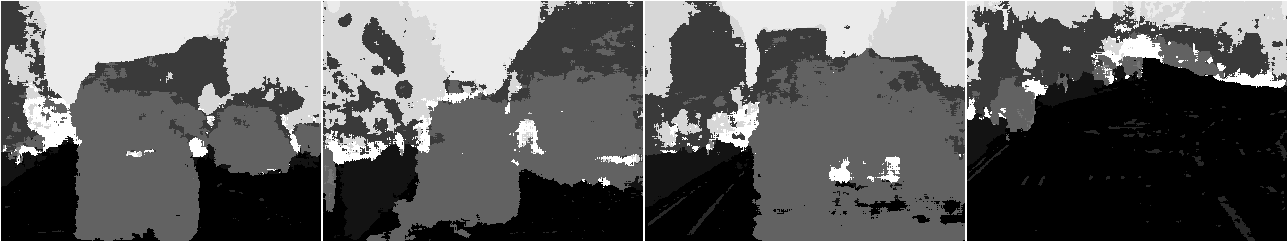

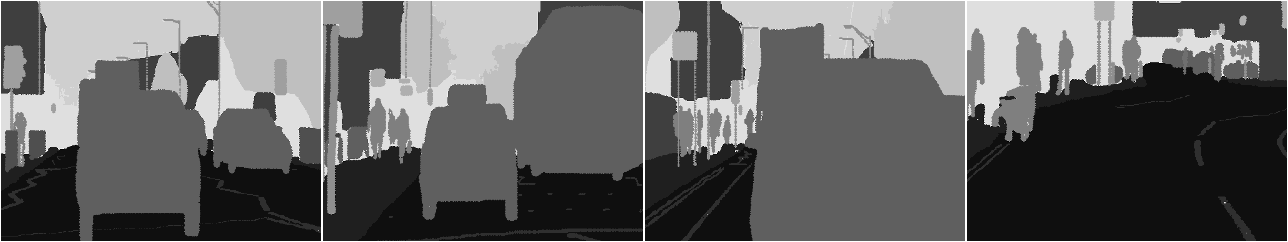

In [55]:
itorch.image(maxs)
itorch.image(trainer.target)